# Cross-entropy (CE) Method Test on Discrete Output
with Categorical distribution

Tips:
* N*ratio should not be too small, especially at the beginning, otherwise it will converge fast for categorical distribution, which may lead to sub-optimal.

true min:  -4.957734573741763e-05
[0.12, 0.0, 0.0, 0.08, 0.04, 0.12, 0.0, 0.08, 0.0, 0.0, 0.04, 0.0, 0.04, 0.16, 0.0, 0.04, 0.0, 0.04, 0.08, 0.0, 0.0, 0.08, 0.04, 0.0, 0.0, 0.04, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.24, 0.0, 0.0, 0.16, 0.08, 0.2, 0.0, 0.16, 0.0, 0.0, 0.04, 0.0, 0.08, 0.04, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.56, 0.0, 0.0, 0.24, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

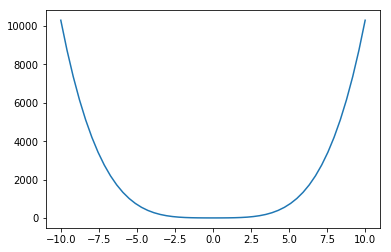

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.distributions import Categorical

# Hyperparameters
N=50  # number of samples for each iteration
ratio=0.5  # select top ratio% samples wrt f(x)
num_itr=5  # iterations of CEM
x_dim=50  # dimension of x

f=lambda x: 3*x**2+x**4+1  # the score function, evaluate how good is x

# In this example we try to find minimal of score value, we give the ground truth using continuous value samples
samples = np.random.normal(0,1,1000) # x-value of f(x)
print('true min: ', samples[np.argmin(f(samples))])

# the categorical distribution for generating x
dist=Categorical(torch.tensor(x_dim*[1./x_dim]))
num_selected = int(N*ratio)  # how many samples are selected according to the ratio

for i in range(num_itr):
    # sample
    x=dist.sample((N,)).numpy()
    # select top ratio% (max [-a:]or min [:a])
    selected_samples = x[np.array(f(x)).argsort()[:num_selected]]
    # count selected samples 
    counts = [np.count_nonzero(selected_samples==i) for i in range(x_dim)]
    # get probability list of selected samples distribution
    prob_list = (np.array(counts)/float(num_selected)).tolist()
    # re-fit the categorical distribution
    dist = Categorical(torch.tensor(prob_list))
    
    print(prob_list)

# show the shape of function f(x)
x=np.linspace(-10,10,N)
y=f(x)
plt.plot(x,y)
plt.show()



## Soft update

true min:  9.083741204886473e-05
[0.03 0.05 0.03 0.07 0.03 0.05 0.01 0.07 0.01 0.03 0.03 0.05 0.01 0.05
 0.03 0.03 0.01 0.01 0.03 0.07 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
[0.015 0.025 0.015 0.115 0.055 0.125 0.005 0.095 0.045 0.055 0.055 0.085
 0.005 0.065 0.015 0.015 0.005 0.005 0.015 0.035 0.005 0.005 0.005 0.005
 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 0.005 0.005]
[0.0275 0.0525 0.0075 0.1575 0.0875 0.2025 0.0025 0.1875 0.0225 0.0275
 0.0275 0.0425 0.0025 0.0325 0.0075 0.0075 0.0025 0.0025 0.0075 0.0175
 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025
 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025
 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025]
[0.07375 0.08625 0.00375 0.27875 0.12375 0.20125 0

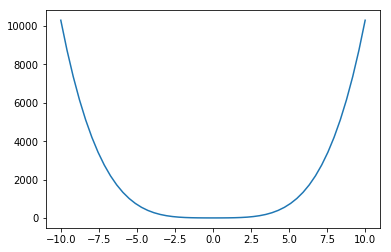

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.distributions import Categorical

# Hyperparameters
N=50  # number of samples for each iteration
ratio=0.5  # select top ratio% samples wrt f(x)
num_itr=20  # iterations of CEM
x_dim=50  # dimension of x
alpha = 0.5 # soft update parameter

f=lambda x: 3*x**2+x**4+1  # the score function, evaluate how good is x

# In this example we try to find minimal of score value, we give the ground truth using continuous value samples
samples = np.random.normal(0,1,1000) # x-value of f(x)
print('true min: ', samples[np.argmin(f(samples))])

# the categorical distribution for generating x
last_prob_list = x_dim*[1./x_dim]
dist=Categorical(torch.tensor(last_prob_list))
num_selected = int(N*ratio)  # how many samples are selected according to the ratio

for i in range(num_itr):
    # sample
    x=dist.sample((N,)).numpy()
    # select top ratio% (max [-a:]or min [:a])
    selected_samples = x[np.array(f(x)).argsort()[:num_selected]]
    # count selected samples 
    counts = [np.count_nonzero(selected_samples==i) for i in range(x_dim)]
    # get probability list of selected samples distribution
    prob_list = (np.array(counts)/float(num_selected)).tolist()
    prob_list = alpha*np.array(prob_list)+(1.-alpha)*np.array(last_prob_list)
    # re-fit the categorical distribution
    dist = Categorical(torch.tensor(prob_list))
    # update last
    last_prob_list = prob_list
    
    print(prob_list)

# show the shape of function f(x)
x=np.linspace(-10,10,N)
y=f(x)
plt.plot(x,y)
plt.show()

